# Exploratory Applets

In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd

Finished running cellPLATO initialization and loaded config.
Initializing:  consistency_test_btrack_v2
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  Z://Collaboration_data/Mace_Lab/my_generated/cellPLATO(dev)/consistency_test_btrack_v2\2022-07-26_07-23-16-353321\plots/
Using unique embedding per dataset shortname:  consistency_test_btrack_v2
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Using corresponding CTL_SHORTLABEL:  WT Day 0  for condition:  Condition_Day0_Stablized WTEL08_B5
Dataset in current notebook:  consistency_test_btrack_v2
Finished initializing data_processing
Finished intializing visualizations


COND_LIST:  ['Condition_Day0_Stablized WTEL08_B5', 'Condition_Day7_Stablized WTEL08_B5', 'all']
REP_LIST:  ['Day0_Stablized WTEL08_B5_1_mask_avg_tracks', 'Day0_Stablized WTEL08_B5_2_mask_avg_tracks', 'Day0_Stablized WTEL08_B5_3_mask_avg_tracks', 'Day7_Stablized WTEL08_B5_1_mask_avg_tracks', 'Day7_Stablized WTEL08_B5_2_mask_avg_tracks', 'Day7_Stablized WTEL08_B5_3_mask_avg_tracks', 'pooled']
Finished initializing cellPLATO


In [2]:
if os.path.exists(cp.SAVED_DATA_PATH + 'dr_df.csv'):
    print(cp.SAVED_DATA_PATH + 'dr_df_.csv',' exists, loading dataframes...')
    
    # Load existing (preprocessed) data
    comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')
    tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
else:
    
    print('File doesnt exist.')

Z://Collaboration_data/Mace_Lab/my_generated/cellPLATO(dev)/consistency_test_btrack_v2\saved_data/dr_df_.csv  exists, loading dataframes...


In [3]:

lab_dr_df.columns

Index(['Unnamed: 0', 'rep_row_ind', 'frame', 'x', 'y', 'z', '_', 'particle',
       'area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity', 'Condition', 'Replicate_ID', 'Cond_label',
       'Rep_label', 'x_um', 'y_um', 'x_pix', 'y_pix', 'index',
       'euclidean_dist', 'segment_length', 'cumulative_length', 'speed',
       'orientedness', 'directedness', 'turn_angle', 'endpoint_dir_ratio',
       'dir_autocorr', 'outreach_ratio', 'MSD', 'max_dist', 'glob_turn_deg',
       'arrest_coefficient', 'Condition_shortlabel', 'Replicate_shortlabel',
       'rip_p', 'rip_K', 'rip_L', 'aspect', 'uniq_id', 'ntpts', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'tSNE1',
       'tSNE2', 'UMAP1', 'UMAP2', 'label', 'traj_id'],
      dtype='object')

In [7]:
# Get a processed dataframe for the selected factor, sort by mean or std
factor = 'aspect'
mean_std_df = cp.get_cell_mean_variance(lab_dr_df, factor, sortby='mean')
display(mean_std_df)

rep  cell_id cell_uniq_ident  \
115  Day0_Stablized WTEL08_B5_2_mask_avg_tracks    189.0           1_189   
955  Day7_Stablized WTEL08_B5_3_mask_avg_tracks   1180.0          5_1180   
877  Day7_Stablized WTEL08_B5_3_mask_avg_tracks    770.0           5_770   
91   Day0_Stablized WTEL08_B5_2_mask_avg_tracks     98.0            1_98   
108  Day0_Stablized WTEL08_B5_2_mask_avg_tracks    161.0           1_161   
..                                          ...      ...             ...   
343  Day7_Stablized WTEL08_B5_1_mask_avg_tracks    534.0           3_534   
283  Day7_Stablized WTEL08_B5_1_mask_avg_tracks    275.0           3_275   
825  Day7_Stablized WTEL08_B5_3_mask_avg_tracks    533.0           5_533   
674  Day7_Stablized WTEL08_B5_2_mask_avg_tracks   1046.0          4_1046   
469  Day7_Stablized WTEL08_B5_2_mask_avg_tracks    121.0           4_121   

         mean       std  
115  3.134807  1.276331  
955  2.866014  0.000000  
877  2.493401  0.000000  
91   2.336978  0.000000  
108  2.335907  0.452330  
..        ...       ...  
343  1.038187  0.000000  
283  1.028294  0.000000  
825  1.025594  0.000000  
674  1.024349  0.000000  
469  1.000310  0.000000  

[1006 rows x 5 columns]

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.09it/s]


Row
    [0] Column(margin=5, name='LowDExplorer', width=300)
        [0] StaticText(value='<b>LowDExplorer</b>')
        [1] Select(name='Plot by', options=OrderedDict([('tSNE', ...]), value='umap')
        [2] IntSlider(end=100, name='Cell i', start=1, value=20, value_throttled=20)
        [3] FloatSlider(end=5, name='Contour scale', start=0.2, value=1.0, value_throttled=1.0)
    [1] ParamMethod(method)
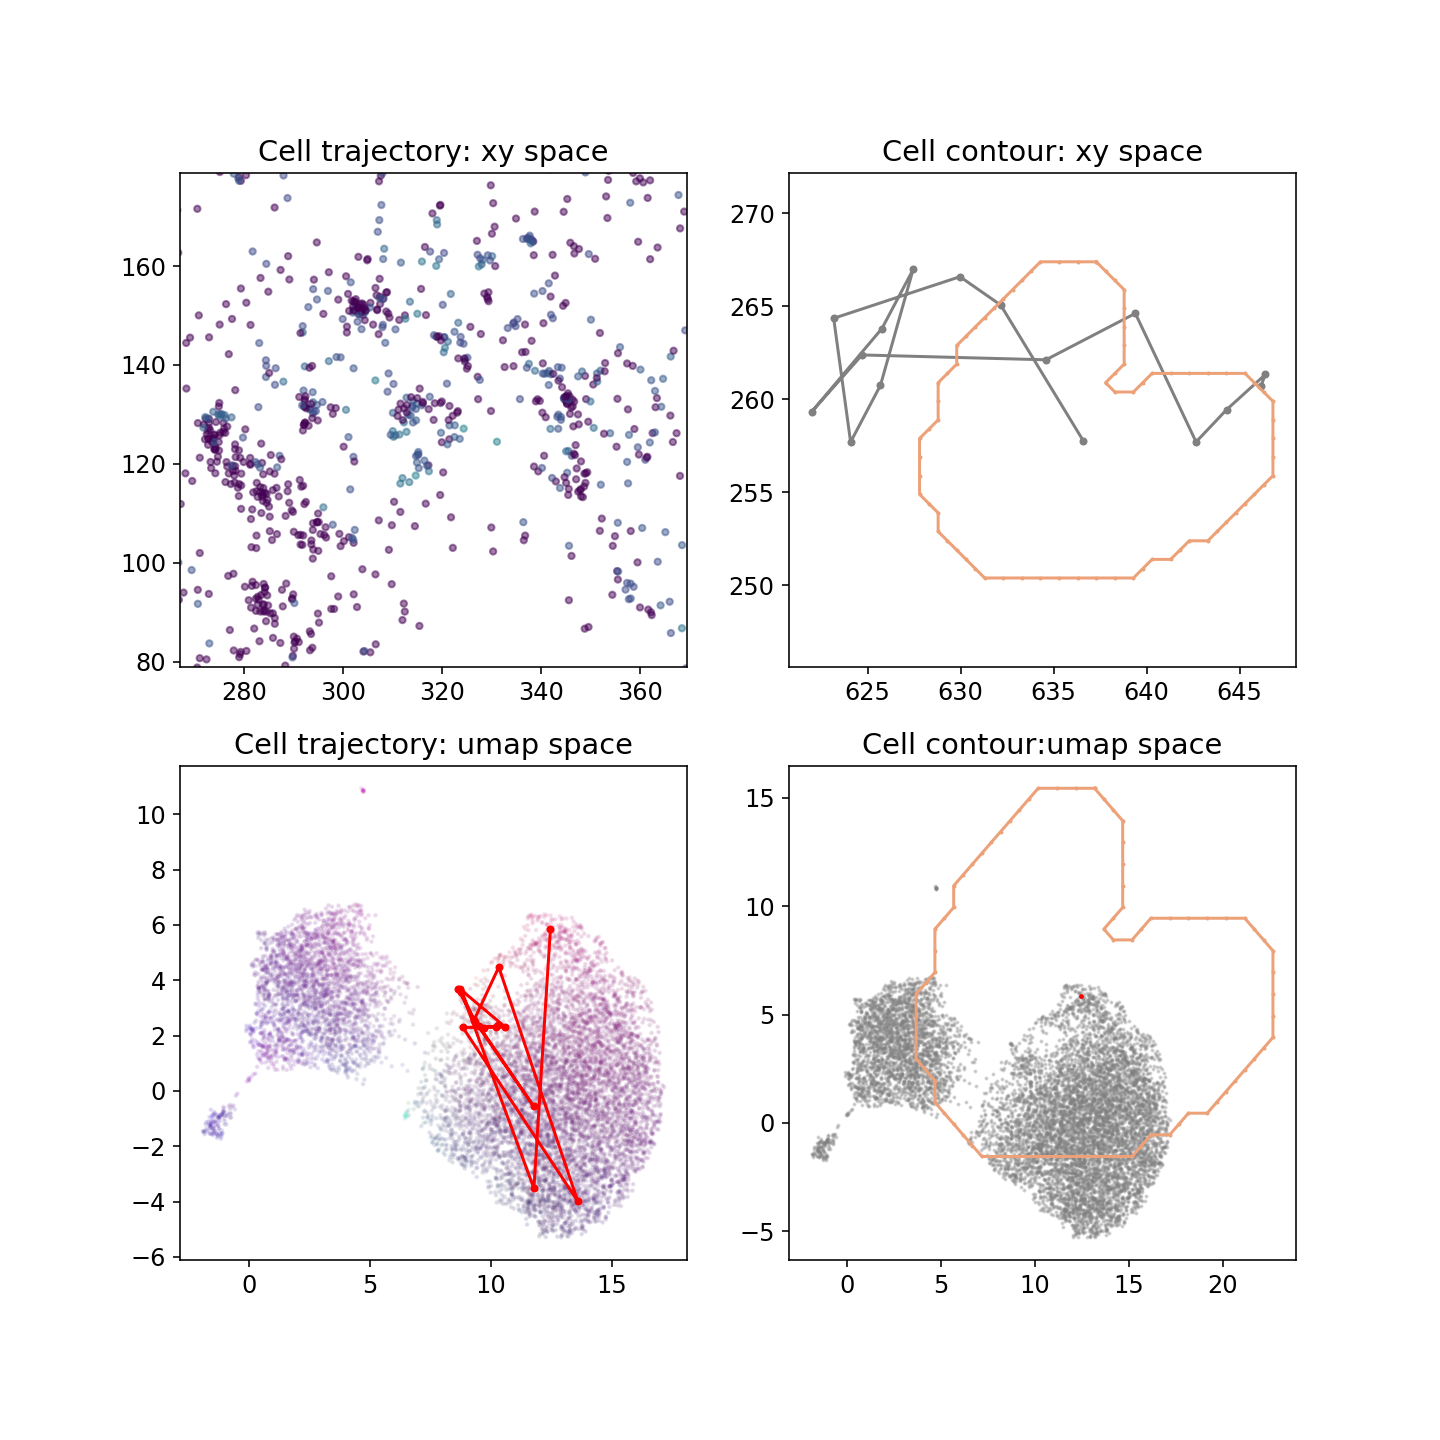

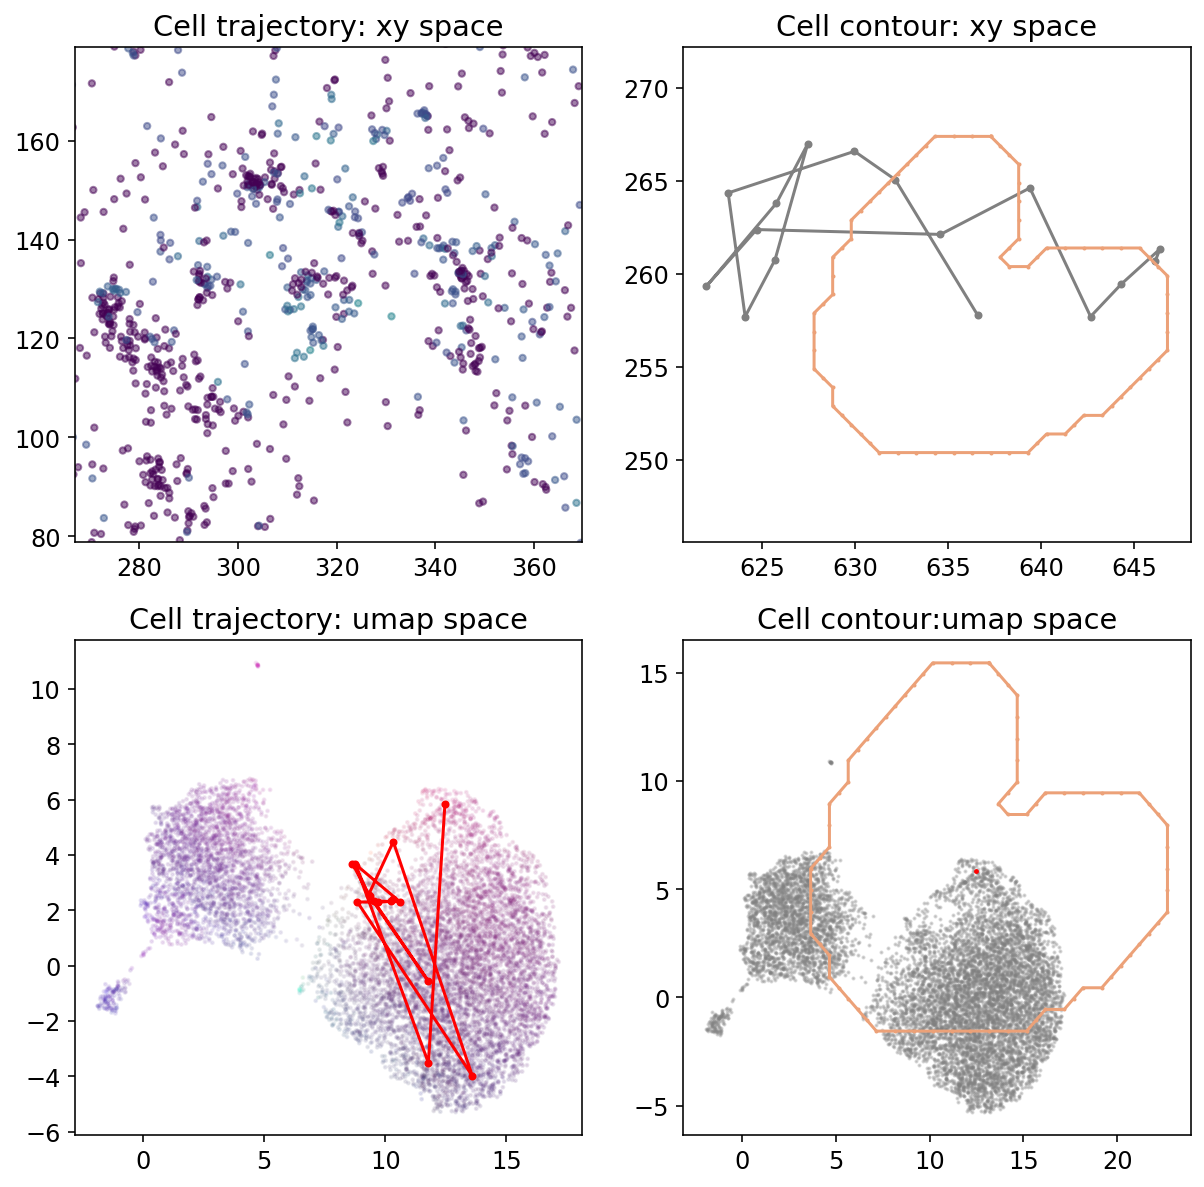

In [8]:
# Pass the processed dataframe to the lowD explorer - cell_i is related to position in sorted list.
# LowDExplorer
lowd = cp.LowDExplorer(dr_df,mean_std_df)
lowd.panel().servable()

In [8]:
rand_cell_df = cp.get_random_cell(lab_dr_df)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 79.15it/s]


Row
    [0] Column(margin=5, name='MetricsExplorer', width=300)
        [0] StaticText(value='<b>MetricsExplorer</b>')
        [1] Select(name='Fac1', options=OrderedDict([('area', ...]), value='speed')
        [2] Select(name='Fac2', options=OrderedDict([('area', ...]), value='area')
        [3] IntSlider(end=50, name='Frame', start=1, value=10, value_throttled=10)
        [4] Select(name='Plot by', options=OrderedDict([('xy', ...]), value='xy')
    [1] ParamMethod(method)
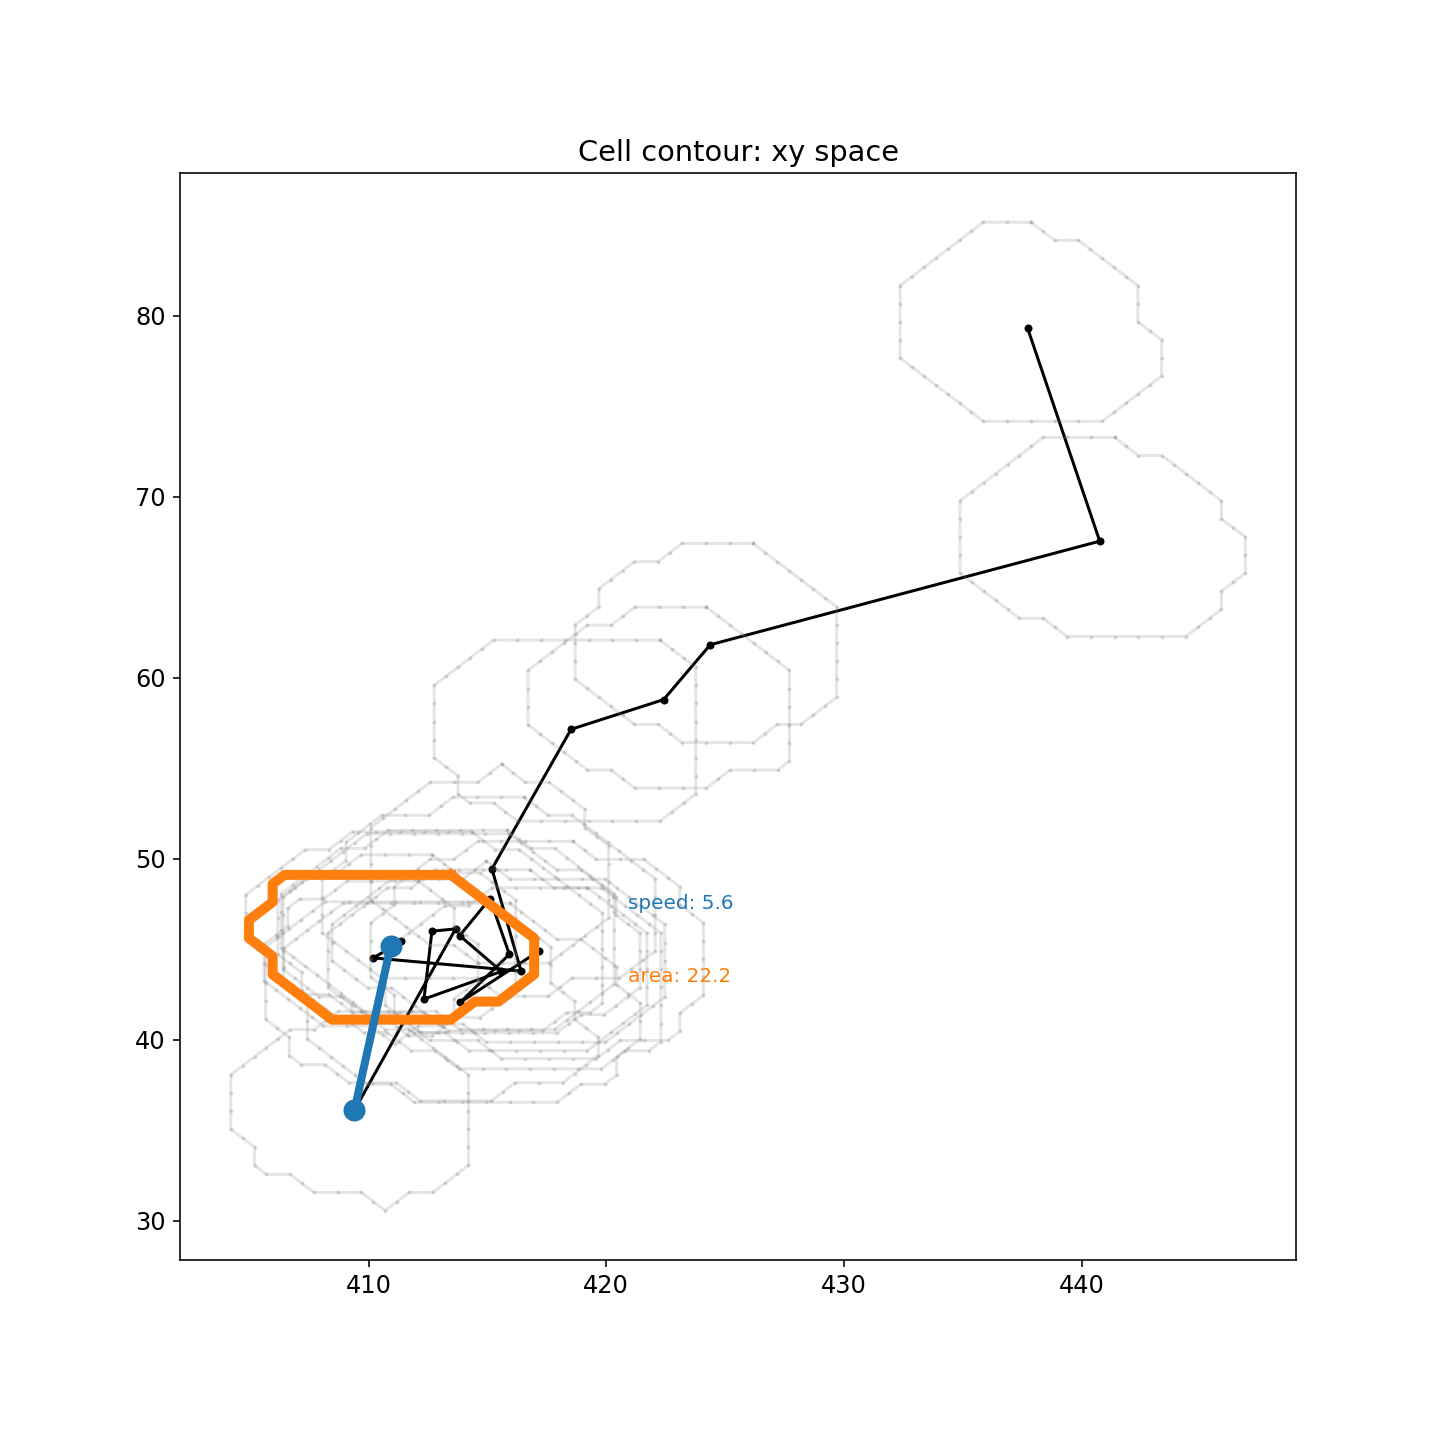

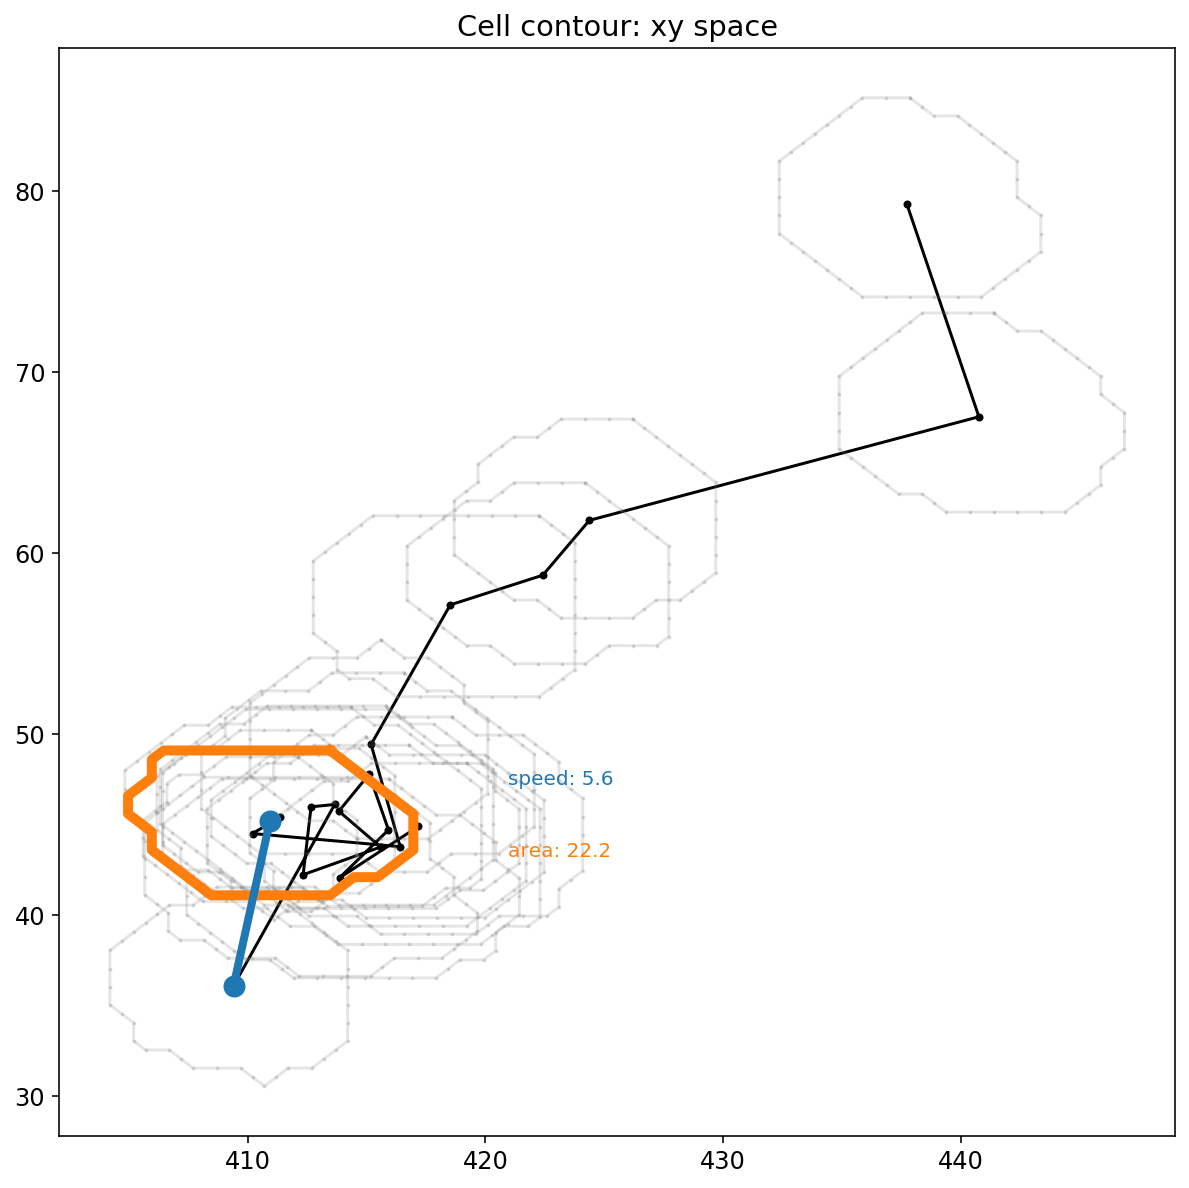

In [9]:
# MetricsExplorer
metrics = cp.MetricsExplorer(rand_cell_df)
metrics.panel().servable()

In [3]:
# FilterExplorer before dimension reduction (comb_df)
filt = cp.FilterExplorer(comb_df)
filt.panel().servable()

Applying filters:
{'speed': (0, 50.0), 'area': (0, 50.0), 'ntpts': (0, 100.0)}
Beginning filtering ...
9334  data points from  1006  cells
Applying filters to entire cell trajectory:
{'speed': (0, 50.0), 'area': (0, 50.0), 'ntpts': (0, 100.0)}
...
 Finished filtering. Resulting dataframe contains:
8104  data points from  921  cells


Applying filters: 
{'speed': (2, 50), 'area': (2, 50), 'ntpts': (0, 100.0)} 
Beginning filtering ... 
9334 data points from 1006 cells 
Applying filters to entire cell trajectory: 
{'speed': (2, 50), 'area': (2, 50), 'ntpts': (0, 100.0)} 
... 
 Finished filtering. Resulting dataframe contains: 
1104 data points from 301 cells 
Applying filters: 
{'speed': (10.4, 50), 'area': (10.4, 50), 'ntpts': (0, 100.0)} 
Beginning filtering ... 
9334 data points from 1006 cells 
Applying filters to entire cell trajectory: 
{'speed': (10.4, 50), 'area': (10.4, 50), 'ntpts': (0, 100.0)} 
... 
 Finished filtering. Resulting dataframe contains: 
47 data points from 32 cells 
Applying filters: 
{'speed': (10.4, 50), 'area': (10.4, 50), 'ntpts': (0, 100.0)} 
Beginning filtering ... 
9334 data points from 1006 cells 
Applying filters to entire cell trajectory: 
{'speed': (10.4, 50), 'area': (10.4, 50), 'ntpts': (0, 100.0)} 
... 
 Finished filtering. Resulting dataframe contains: 
47 data points from 32 cells 
Applying filters: 
{'speed': (9, 50), 'area': (9, 50), 'ntpts': (0, 100.0)} 
Beginning filtering ... 
9334 data points from 1006 cells 
Applying filters to entire cell trajectory: 
{'speed': (9, 50), 'area': (9, 50), 'ntpts': (0, 100.0)} 
... 
 Finished filtering. Resulting dataframe contains: 
74 data points from 44 cells 
Applying filters: 
{'speed': (2.8, 50), 'area': (2.8, 50), 'ntpts': (0, 100.0)} 
Beginning filtering ... 
9334 data points from 1006 cells 
Applying filters to entire cell trajectory: 
{'speed': (2.8, 50), 'area': (2.8, 50), 'ntpts': (0, 100.0)} 
... 
 Finished filtering. Resulting dataframe contains: 
779 data points from 232 cells 
Applying filters: 
{'speed': (2.8, 50), 'area': (2.8, 50), 'ntpts': (0, 100.0)} 
Beginning filtering ... 
9334 data points from 1006 cells 
Applying filters to entire cell trajectory: 
{'speed': (2.8, 50), 'area': (2.8, 50), 'ntpts': (0, 100.0)} 
... 
 Finished filtering. Resulting dataframe contains: 
779 data points from 232 cells

Row
    [0] Column(margin=5, name='FilterExplorer', width=300)
        [0] StaticText(value='<b>FilterExplorer</b>')
        [1] Select(name='Filt1', options=OrderedDict([('area', ...]), value='speed')
        [2] RangeSlider(end=50, name='Filt1 range', value=(0, 50.0), value_throttled=(0, 50.0))
        [3] Select(name='Filt2', options=OrderedDict([('area', ...]), value='area')
        [4] RangeSlider(end=100, name='Filt2 range', value=(0, 100.0), value_throttled=(0, 100.0))
        [5] RangeSlider(end=100.0, name='Ntpts range', value=(0, 100.0), value_throttled=(0, 100.0))
        [6] Select(name='How', options=OrderedDict([('any', ...]), value='any')
        [7] Select(name='Plot by', options=OrderedDict([('xy', ...]), value='xy')
    [1] ParamMethod(method)
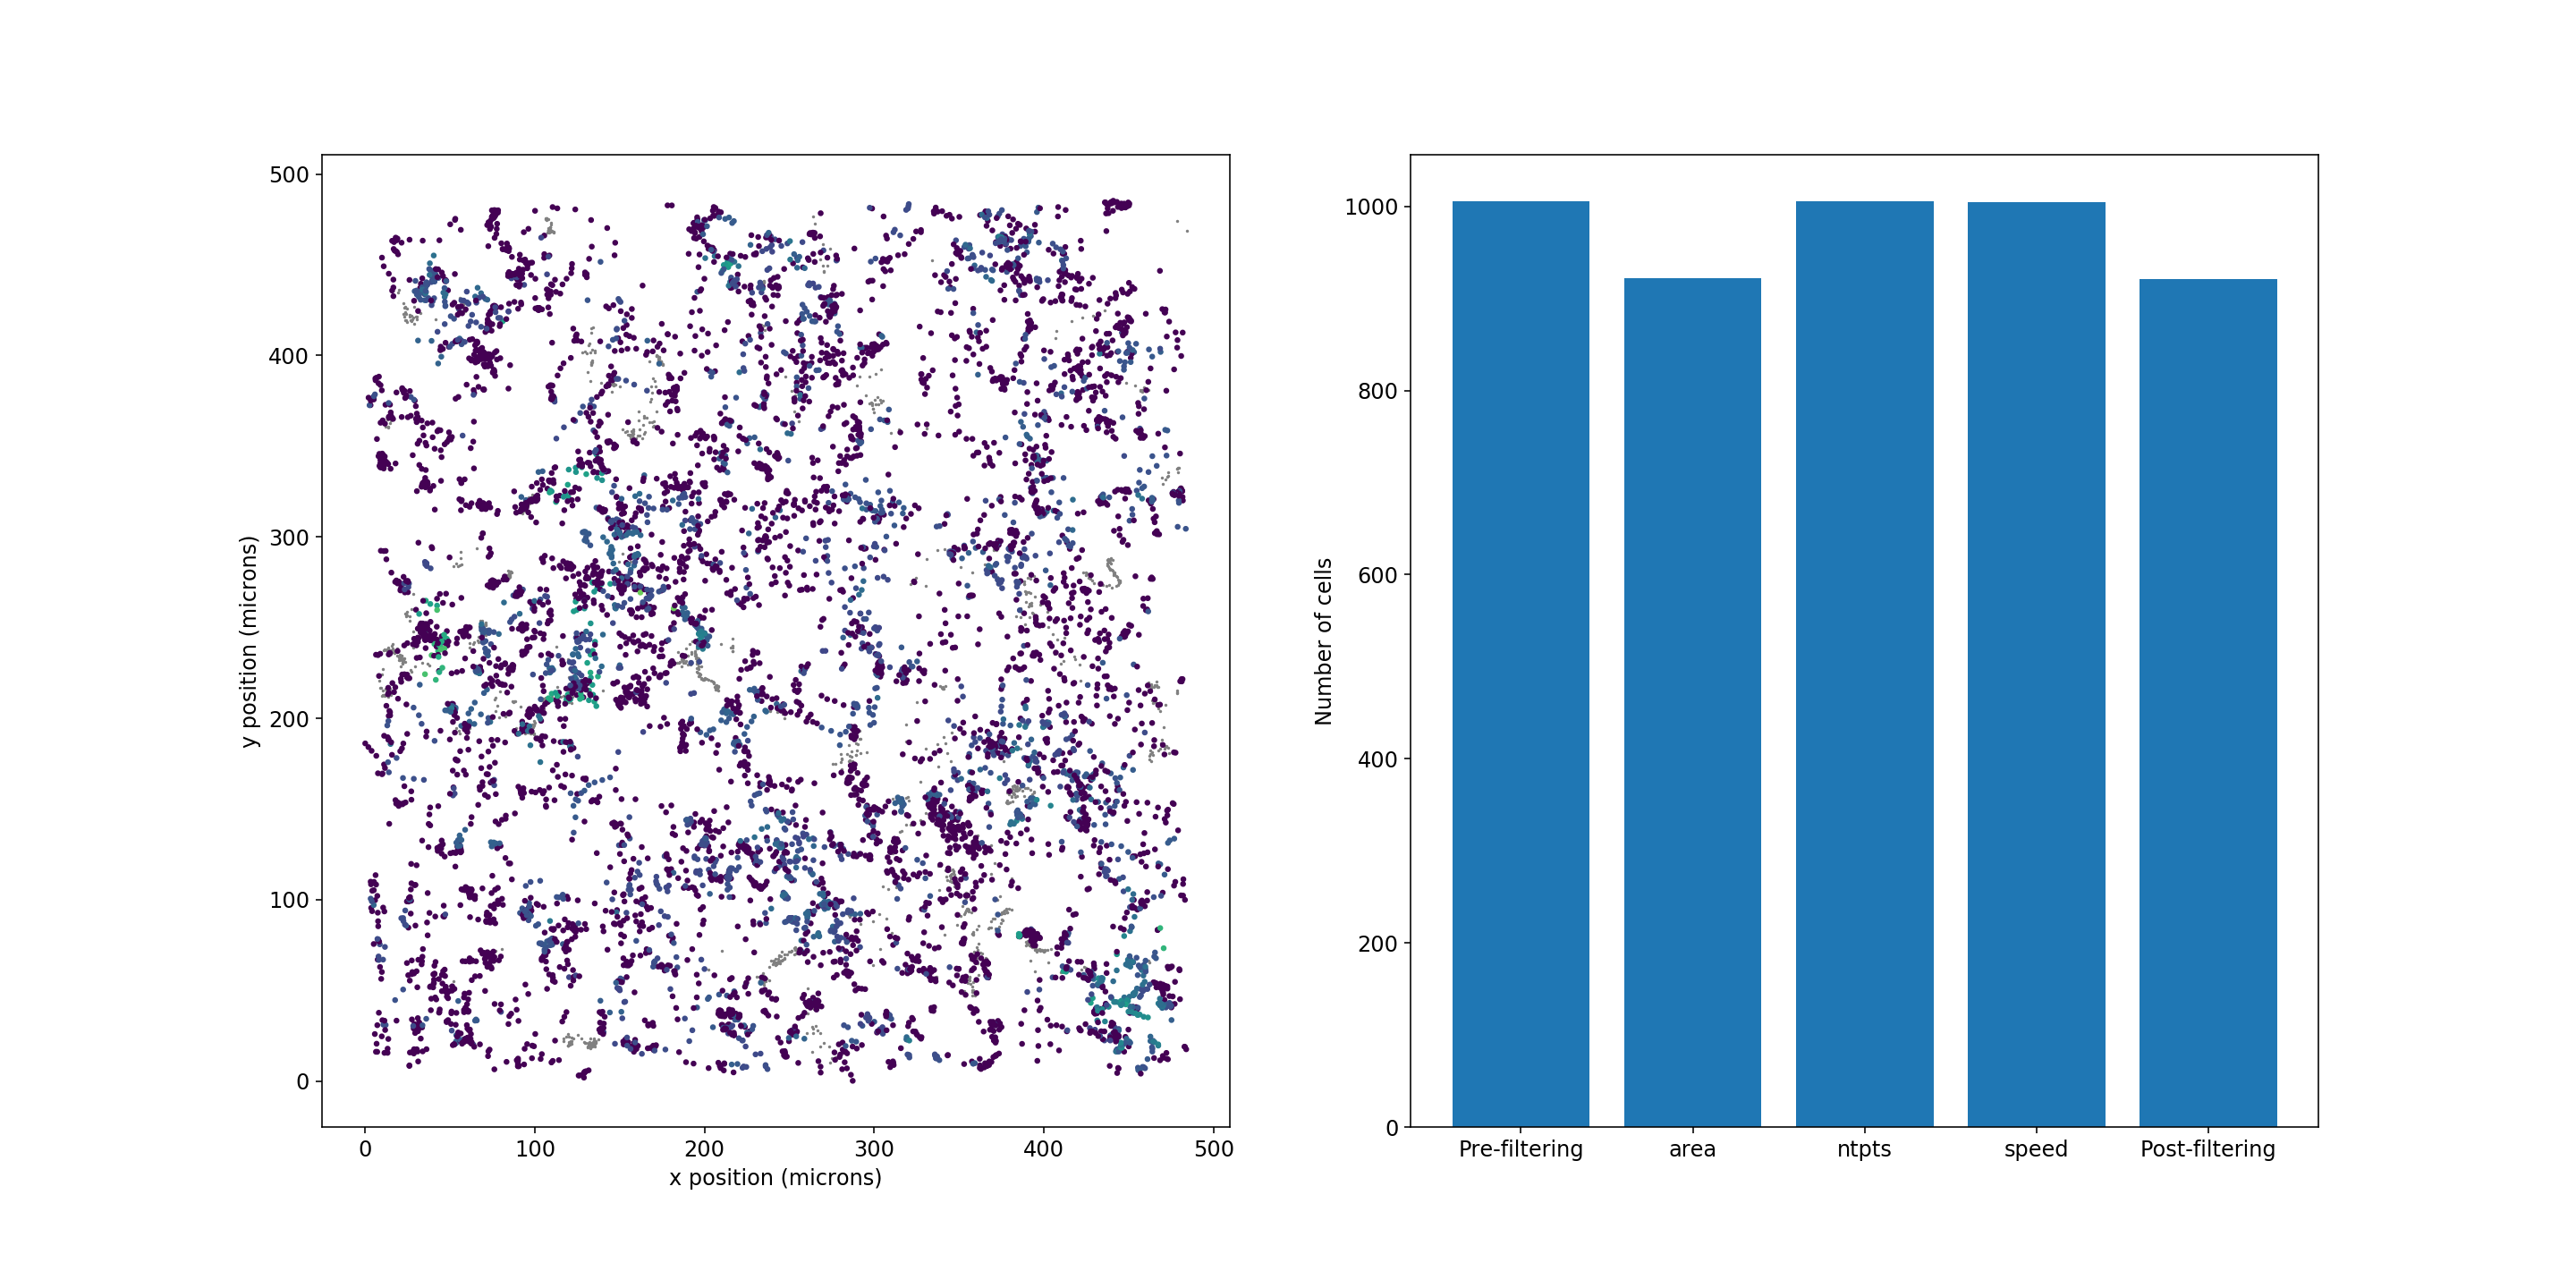

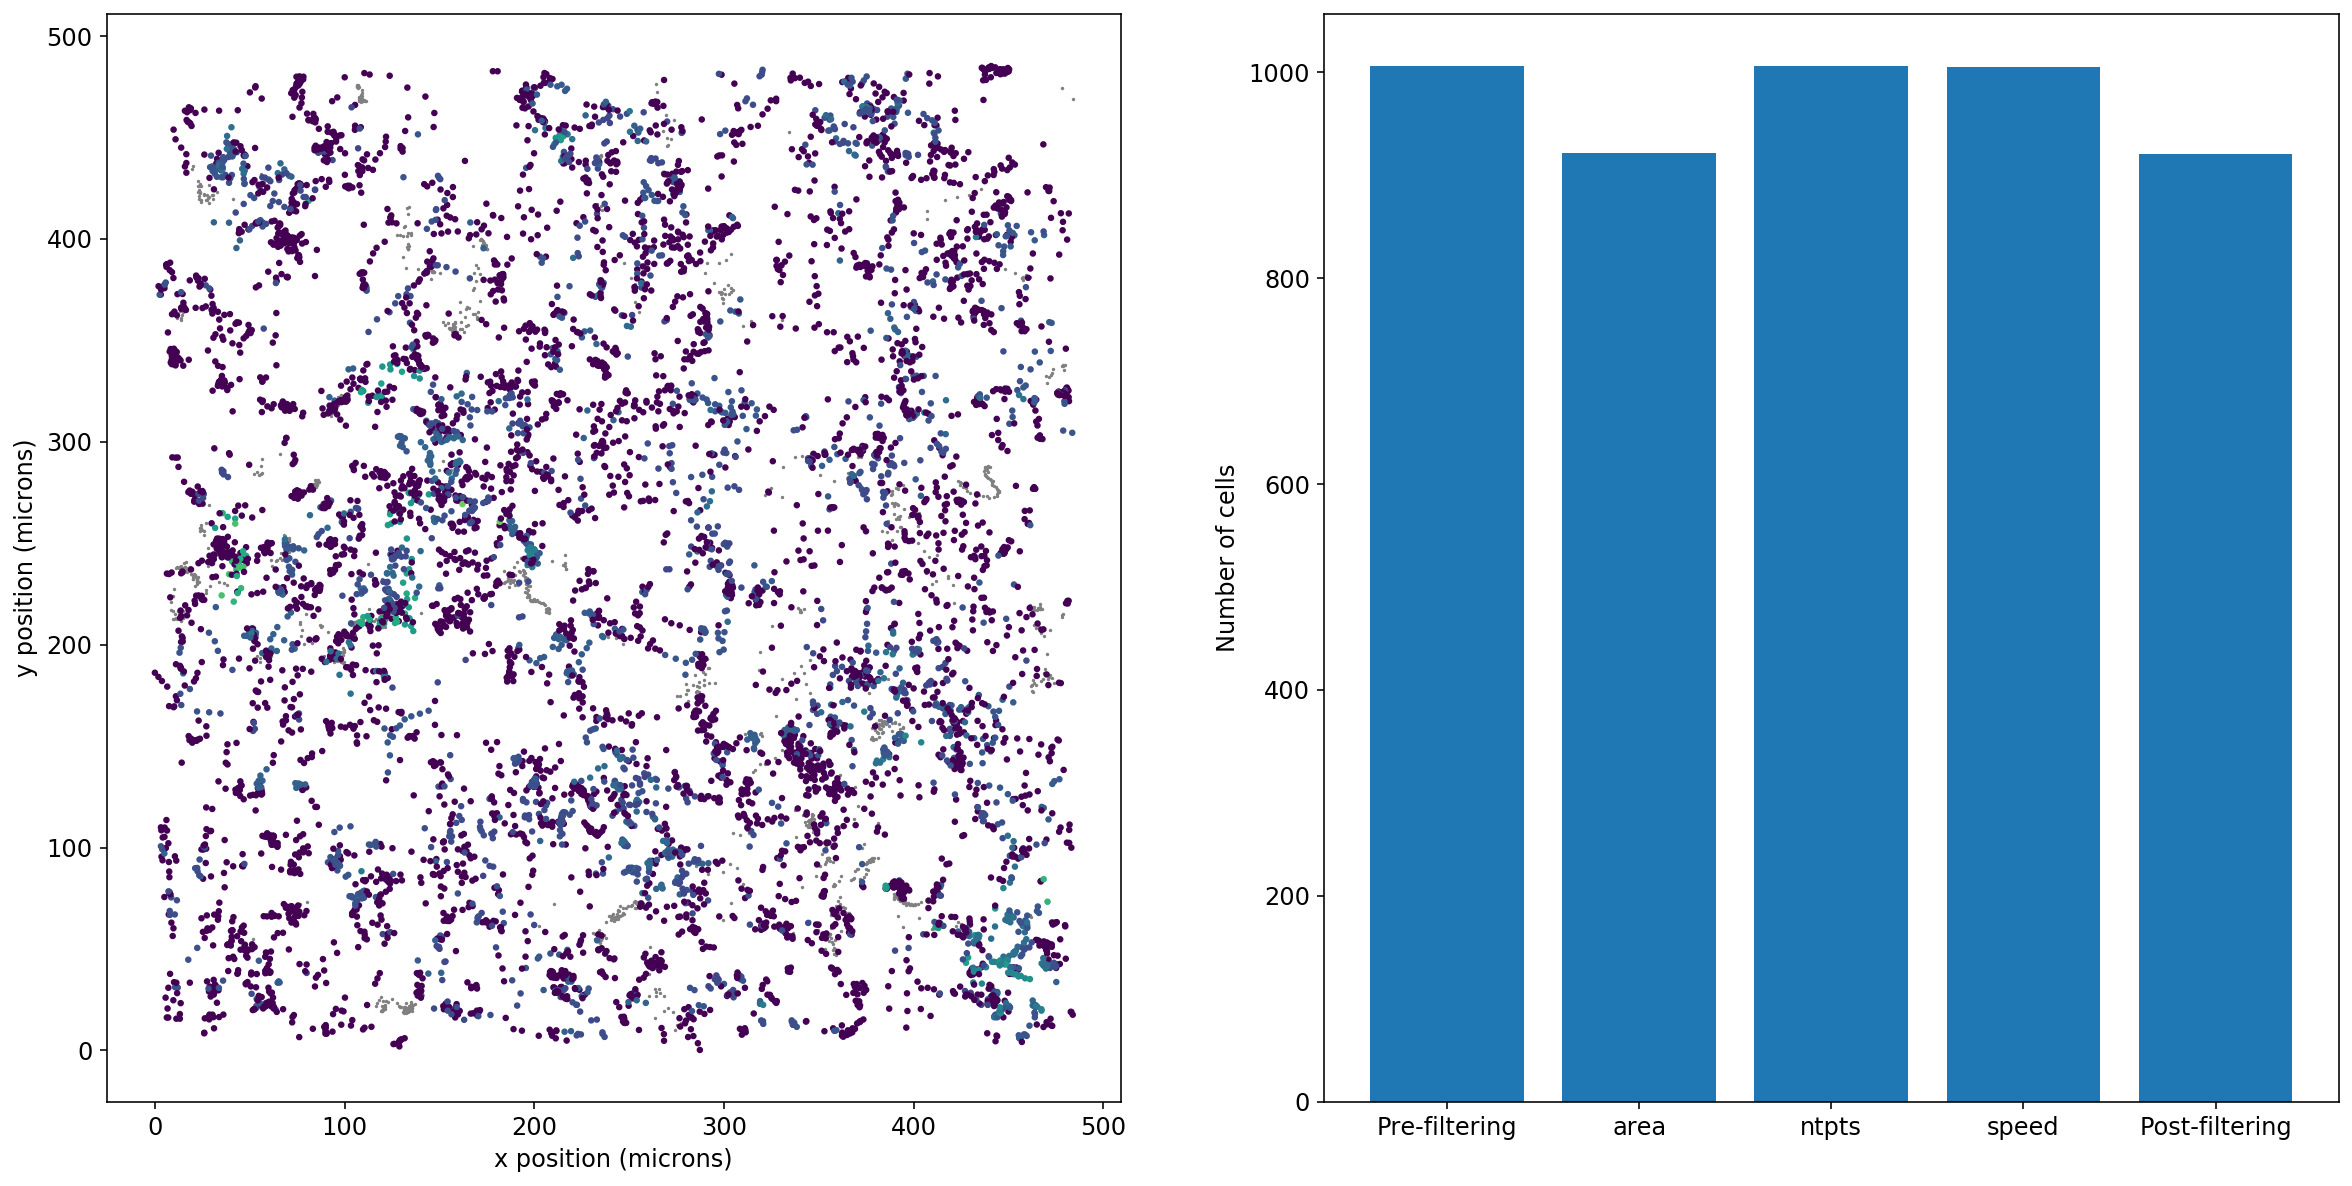

In [4]:
# FilterExplorer after dimension reduction (dr_df)
filt = cp.FilterExplorer(lab_dr_df)
filt.panel().servable()

Running dr_pipeline...
tSNE perplexity =  185
UMAP nearest neighbors =  15  min distance =  0.5
Using standardized factors for dimensionality reduction, matrix shape:  (9334, 28)
Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (9334, 2)
hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by tSNE...


Row
    [0] Column(margin=5, name='HdbscanExplorer', width=300)
        [0] StaticText(value='<b>HdbscanExplorer</b>')
        [1] FloatSlider(end=200.0, name='Perplexity', value=185, value_throttled=185)
        [2] FloatSlider(end=50.0, name='Early exaggeration', value=12.0, value_throttled=12.0)
        [3] IntSlider(end=1000, name='N iter', start=25, value=250, value_throttled=250)
        [4] FloatSlider(end=1000.0, name='Learning rate', start=10.0, value=200.0, value_throttled=200.0)
        [5] IntSlider(end=20, name='Random state', value=11, value_throttled=11)
        [6] IntSlider(end=50, name='Umap nn', start=1, value=15, value_throttled=15)
        [7] FloatSlider(name='Umap min dist', start=0.1, value=0.5, value_throttled=0.5)
        [8] Select(name='Factor', options=OrderedDict([('area', ...]), value='area')
        [9] IntSlider(end=100, name='Min cluster size', start=1, value=20, value_throttled=20)
        [10] Select(name='Cluster by', options=OrderedDict([('xy', ...]), value='tSNE')
        [11] Select(name='Color by', options=OrderedDict([('condition',...]), value='condition')
    [1] ParamMethod(method)
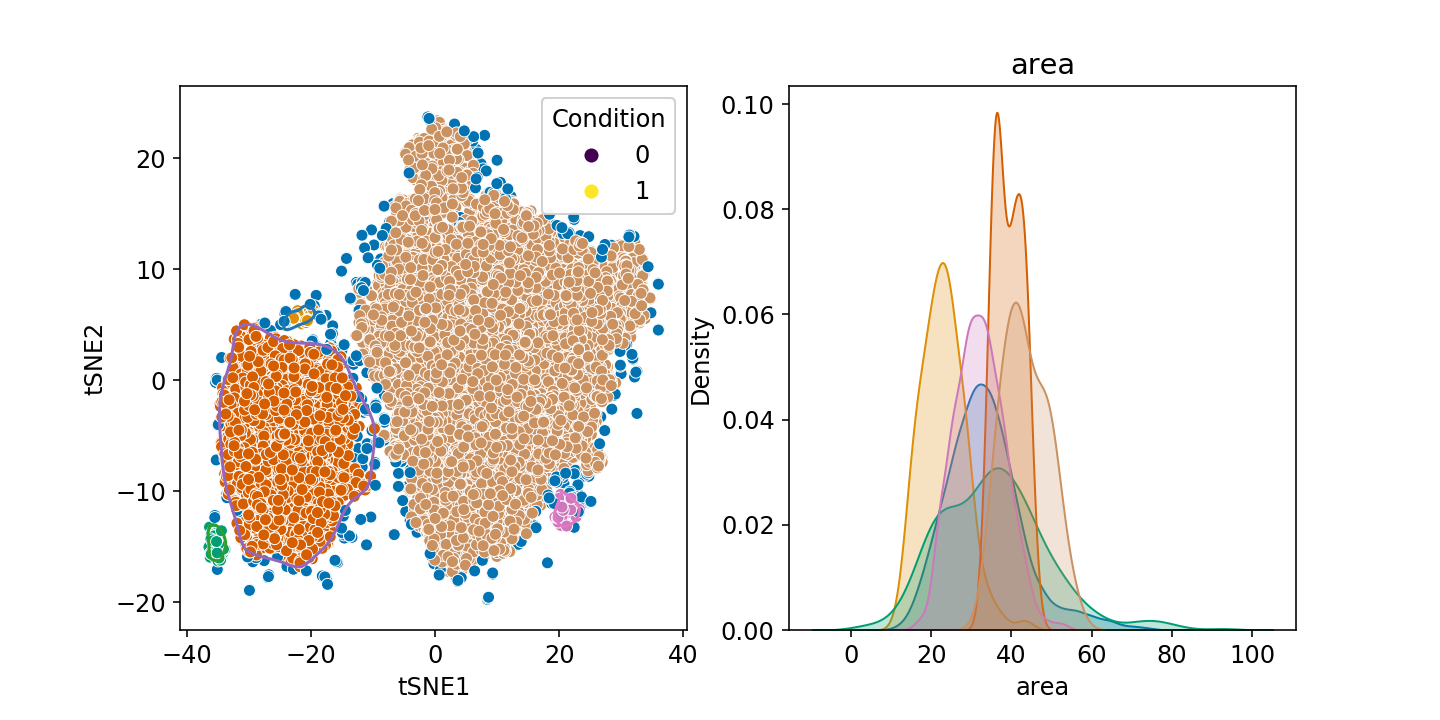

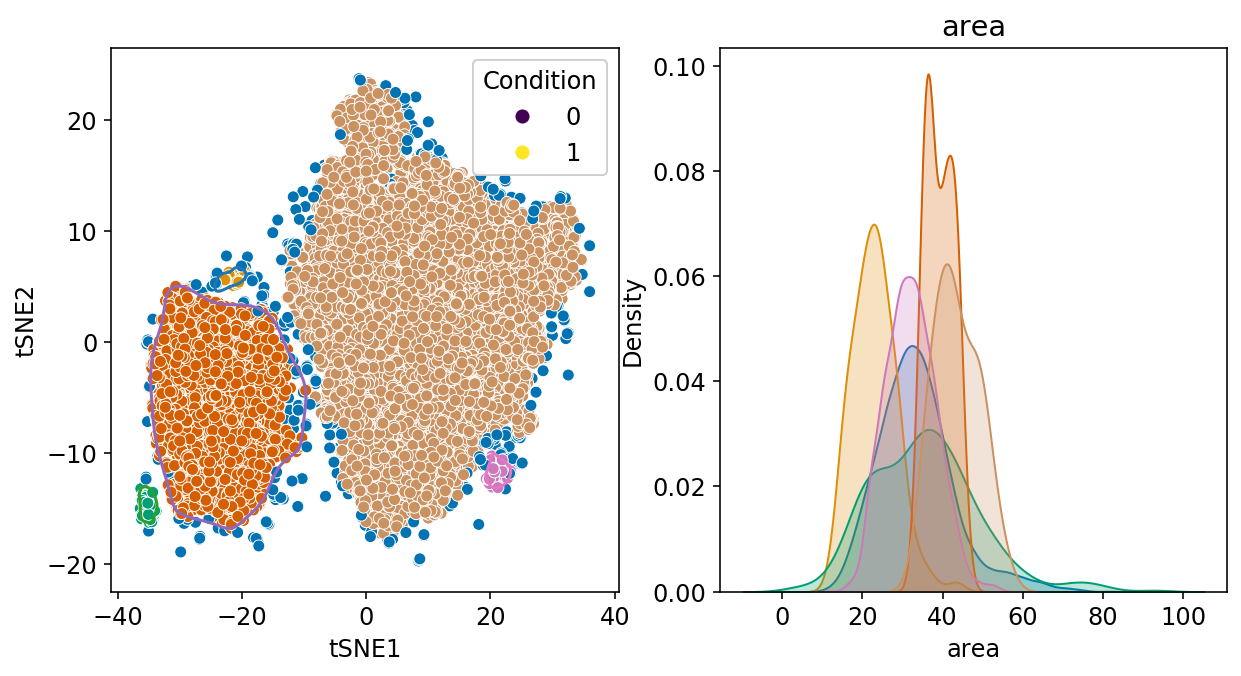

In [5]:
# HdbscanExplorer
hdb = cp.HdbscanExplorer(comb_df)
hdb.panel().servable()

hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by tSNE...


hdbscan_clustering() with min_cluster_size = 20 
DBScan clustering by UMAP... 
hdbscan_clustering() with min_cluster_size = 20 
DBScan clustering by UMAP...

Row
    [0] Column(margin=5, name='ClusterExplorer', width=300)
        [0] StaticText(value='<b>ClusterExplorer</b>')
        [1] Select(name='Factor', options=OrderedDict([('area', ...]), value='area')
        [2] IntSlider(end=100, name='Min cluster size', start=1, value=20, value_throttled=20)
        [3] Select(name='Cluster by', options=OrderedDict([('xy', ...]), value='tSNE')
        [4] Select(name='Color by', options=OrderedDict([('condition',...]), value='condition')
    [1] ParamMethod(method)
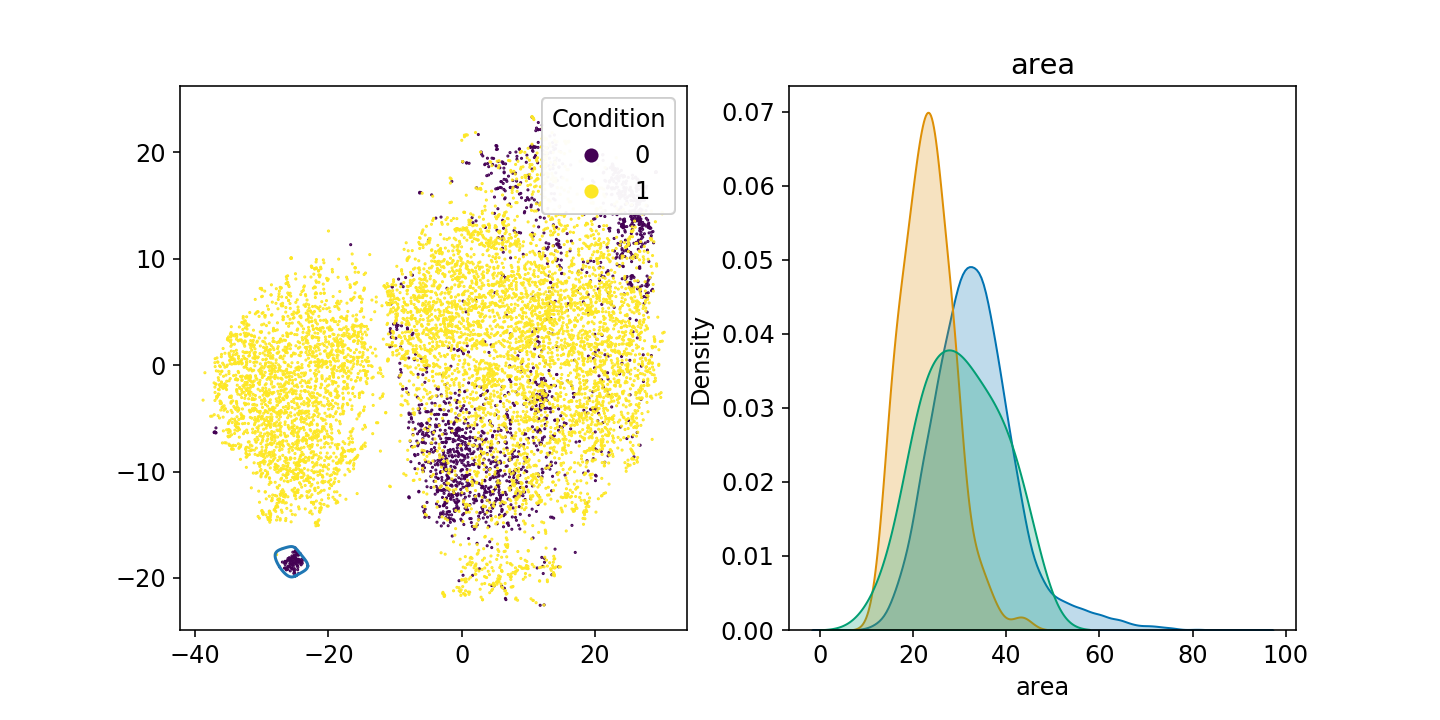

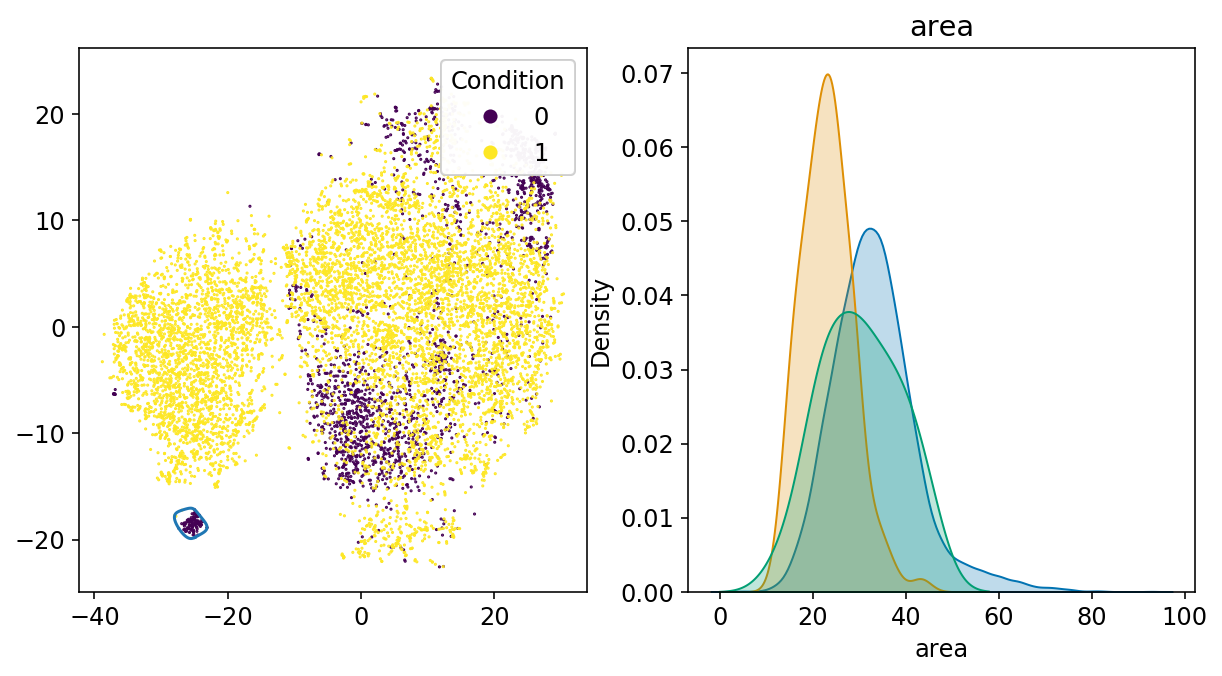

In [3]:
# Explore clustering by xy position, tSNE or PCA values
clust = cp.ClusterExplorer(dr_df)
clust.panel().servable()

In [3]:
# Panel app to interactively explore the effect of filtering
explorer = cp.ScatterExplorer(lab_dr_df)
explorer.panel().servable()

Row
    [0] Column(margin=5, name='ScatterExplorer', width=300)
        [0] StaticText(value='<b>ScatterExplorer</b>')
        [1] Select(name='X variable', options=OrderedDict([('area', ...]), value='area')
        [2] Select(name='Y variable', options=OrderedDict([('area', ...]), value='speed')
        [3] IntSlider(end=50, name='Frame', start=1, value=50, value_throttled=50)
        [4] Select(name='Filt1', options=OrderedDict([('area', ...]), value='speed')
        [5] FloatSlider(end=200.0, name='Filt1 thresh', start=-100.0, value_throttled=0.0)
        [6] Select(name='Filt2', options=OrderedDict([('area', ...]), value='area')
        [7] RangeSlider(end=400, name='Filt2 range', start=-100, value=(-100, 400.0), value_throttled=(-100, 400.0))
        [8] Select(name='Filt3', options=OrderedDict([('area', ...]), value='area')
        [9] RangeSlider(end=100.0, name='Filt3 range', start=-100.0, value=(-100.0, 100.0), value_throttled=(-100.0, 100.0))
        [10] FloatSlider(name='Fraction to display', start=0.01, value=1.0, value_throttled=1.0)
    [1] ParamMethod(method)

In [5]:
# Explore the dimensionaly-reduced data interactively with a jointplot.
exploratory_jointplot = cp.JointExplorer(lab_dr_df)
exploratory_jointplot.panel().servable()

Row
    [0] Column(margin=5, name='JointExplorer', width=300)
        [0] StaticText(value='<b>JointExplorer</b>')
        [1] Select(name='X variable', options=OrderedDict([('area', ...]), value='tSNE1')
        [2] Select(name='Y variable', options=OrderedDict([('area', ...]), value='tSNE2')
        [3] Select(name='Marginals', options=OrderedDict([('rug', ...]), value='histogram')
        [4] IntSlider(end=50, name='Frame', start=1, value=10, value_throttled=10)
        [5] Select(name='Cond', options=OrderedDict([('Condition_D...]), value='all')
        [6] Select(name='Rep', options=OrderedDict([('Day0_Stabli...]), value='pooled')
    [1] ParamMethod(method)

Row
    [0] Column(margin=5, name='TsneDbscanExplorer', width=300)
        [0] StaticText(value='<b>TsneDbscanExplorer</b>...)
        [1] FloatSlider(end=200.0, name='Perplexity', value=30.0, value_throttled=30.0)
        [2] FloatSlider(end=50.0, name='Early exaggeration', value=12.0, value_throttled=12.0)
        [3] IntSlider(end=1000, name='N iter', start=25, value=250, value_throttled=250)
        [4] FloatSlider(end=1000.0, name='Learning rate', start=10.0, value=200.0, value_throttled=200.0)
        [5] IntSlider(end=20, name='Random state', value=11, value_throttled=11)
        [6] FloatSlider(name='Eps', start=0.05, value=0.15, value_throttled=0.15)
        [7] IntSlider(end=50, name='Min samples', start=1, value=10, value_throttled=10)
        [8] Select(name='Cond', options=OrderedDict([('Condition_D...]), value='Condition_Day0_Stablized ...)
        [9] Select(name='Rep', options=OrderedDict([('Day0_Stabli...]), value='Day0_Stablized W...)
        [10] Select(name='Factor', options=OrderedDict([('area', ...]), value='area')
    [1] ParamMethod(method)
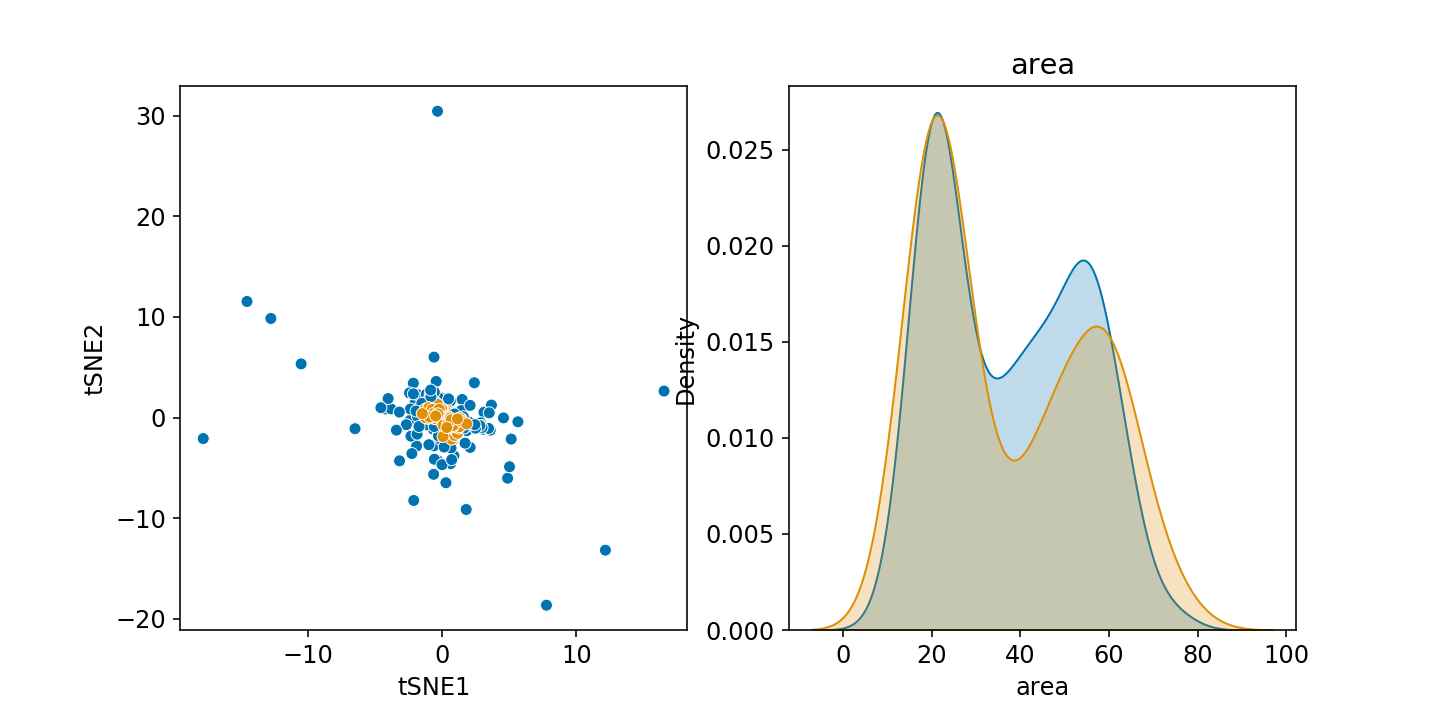

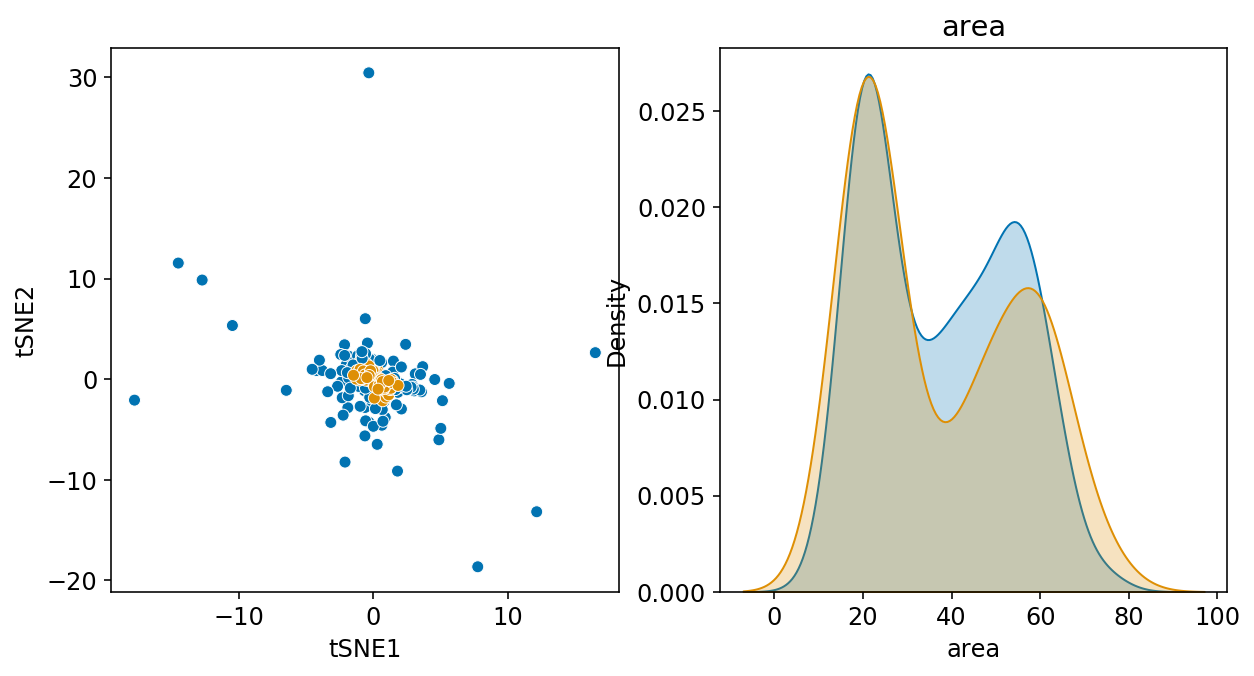

In [4]:
# Interactive panel app to tweak DBScan paramters
tsne_db = cp.TsneDbscanExplorer(comb_df)
tsne_db.panel().servable()

Row
    [0] Column(margin=5, name='ReEmbeddingExplorer', width=300)
        [0] StaticText(value='<b>ReEmbeddingExplorer</b...)
        [1] FloatSlider(end=0.2, name='Eps', start=0.05, value=0.15, value_throttled=0.15)
        [2] IntSlider(end=50, name='Min samples', start=1, value=10, value_throttled=10)
        [3] Select(name='Rep', options=OrderedDict([('Day0_Stabli...]), value='Day0_Stablized W...)
        [4] Select(name='Factor', options=OrderedDict([('area', ...]), value='area')
    [1] ParamMethod(method)
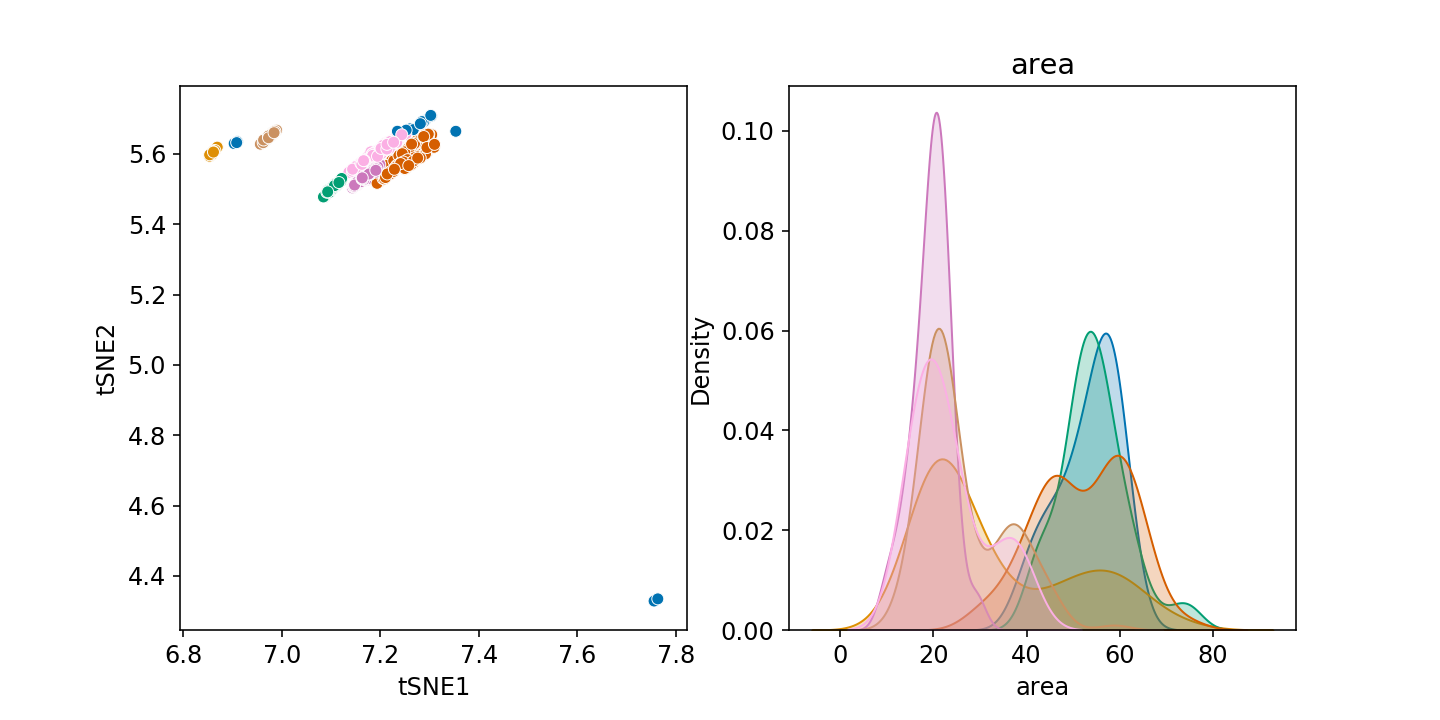

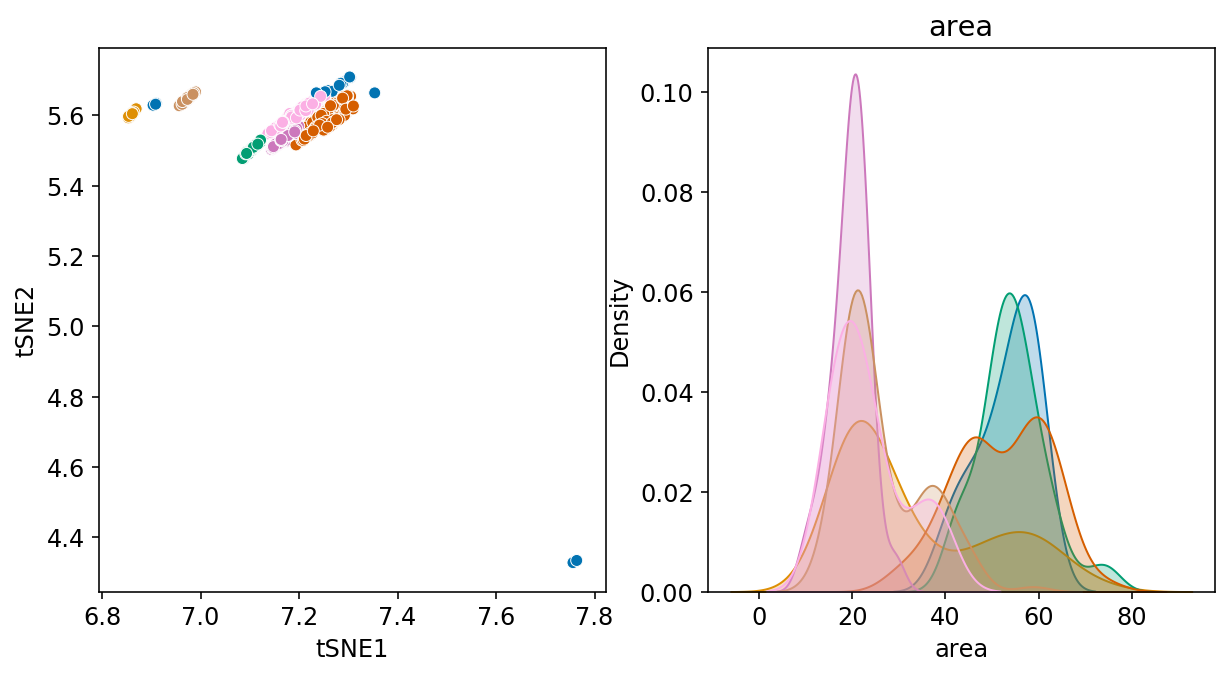

In [4]:
# Explore re-embedding different replicates in the tsne embedding from a single replicate
# As a test for how reproducible/meaningful any clusters may be
embed = cp.ReEmbeddingExplorer(comb_df, perplexity=30)
embed.panel().servable()

In [14]:
tsuperplot = cp.SupertimePlotExplorer(lab_dr_df)
tsuperplot.panel().servable()

Row
    [0] Column(margin=5, name='SupertimePlotExplorer', width=300)
        [0] StaticText(value='<b>SupertimePlotExplorer<...)
        [1] Select(name='Factor', options=OrderedDict([('area', ...]), value='area')
        [2] IntSlider(end=50, name='T window', start=1, value=1, value_throttled=1)
    [1] ParamMethod(method)